In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [13]:
computers_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/computers/computers.csv')
os_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/computers/operating_systems.csv')
invoices_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/computers/invoices.csv')

In [14]:
# Объединение данных
merged_df = pd.merge(invoices_df, computers_df, on='computer_id')
merged_df = pd.merge(merged_df, os_df, on='os_id', how='left')

# Преобразование столбца с датой в формат datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

merged_df['title'] = merged_df['title'].fillna('Unknown')

In [15]:
total_cost = ((merged_df['price_x'] * merged_df['quantity']) + (merged_df['price_y'] * merged_df['quantity'])).sum()
print(f"Суммарная стоимость проданной компьютерной техники: {total_cost:.2f}")

Суммарная стоимость проданной компьютерной техники: 582000.00


In [16]:
daily_sales = merged_df.groupby('date')['price_x'].sum()

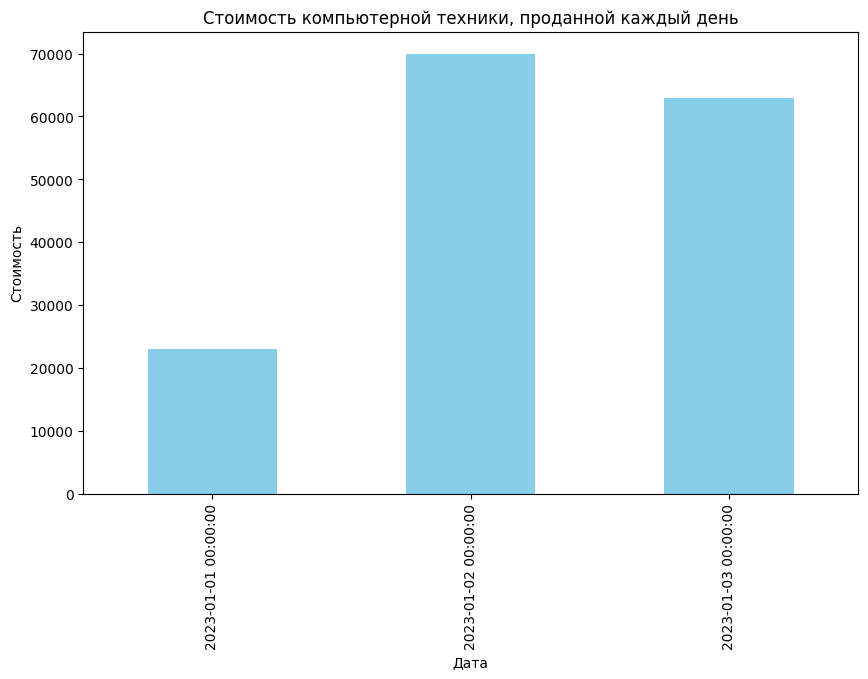

In [17]:
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Стоимость компьютерной техники, проданной каждый день')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.show()


In [18]:
os_options = list(merged_df['title'].unique())  # Используем уникальные значения из объединенного DataFrame
os_dropdown = widgets.Dropdown(options=os_options, description='Выберите ОС:')

output = widgets.Output()

def calculate_total_cost(selected_os):
    os_sales = (merged_df[merged_df['title'] == selected_os]['price_x'] * 
                merged_df[merged_df['title'] == selected_os]['quantity']).sum()
    with output:
        print(f"Суммарная стоимость проданной компьютерной техники с {selected_os}: {os_sales:.2f}")

# Привязываем функцию к изменению значения выпадающего списка
widgets.interactive(calculate_total_cost, selected_os=os_dropdown)

# Отображаем виджет
display(os_dropdown)
display(output)

Dropdown(description='Выберите ОС:', options=('Ubuntu', 'MacOS', 'Linux', 'Unknown'), value='Ubuntu')

Output()